# Lab 6: Clustering 

In this lab, you will gain more experience with clustering. In particular, you will learn how to use two of the most popular clustering algorithms: Hierarchical Clustering and K-Means Clustering. Then, you will be asked to apply this knowledge on a document data set.

## Lab 6.A: Clustering Tutorial with Questions (50% of grade)

Let us start by importing the needed libraries. We will for the first time use sklearn library, which implements many of the most popular data science algorithms. We will be using this library often for the rest of this course. Please, take a moment to look at the sklearn documentation at: http://scikit-learn.org/stable/.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from pandas import crosstab
from pandas.tools.plotting import scatter_matrix
import pandas as p
%matplotlib inline

Let us load the Iris data set and plot a scatter plot of the 2nd and 3rd attributes.

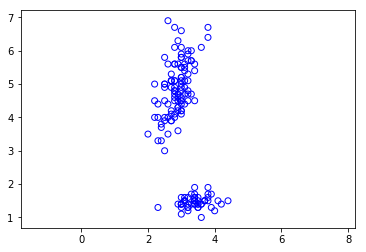

In [3]:
iris = datasets.load_iris()
d = iris.data
y = iris.target

plt.scatter(d[:,1],d[:,2],facecolors='none',color='blue')
plt.axis('equal');

## Hierarchical Clustering
Let us run the **hierarchical clustering** on the 2 columns of Iris. We will use only the first 20 rows. We'll call this new data set `dnew`.

In [18]:
A=range(0,20)
dnew = d[A,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 2, criterion='maxclust')

Let us now plot the dendrogram. 

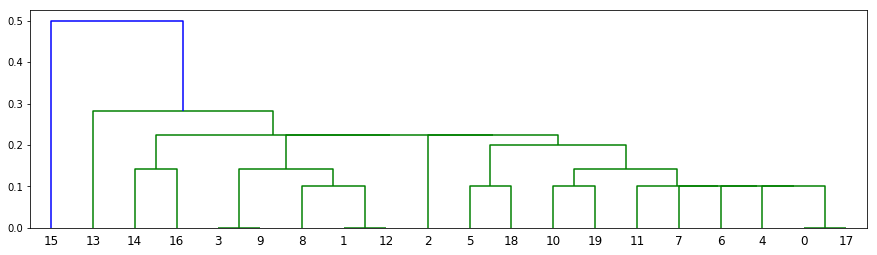

In [19]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);

And, let us see the outcome of clustering

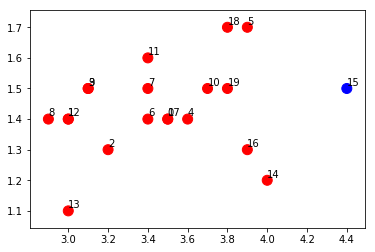

In [119]:
plt.figure()
colors=['red','blue']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

**Question 1**: Let us play with the clustering options
- Make 3 clusters. Discuss the result
- Use several different methods, other than 'single'. Try 'average' and one more of your choice. Discuss the result.
- Use a metric other than 'Eucliedean'. Discuss the result.



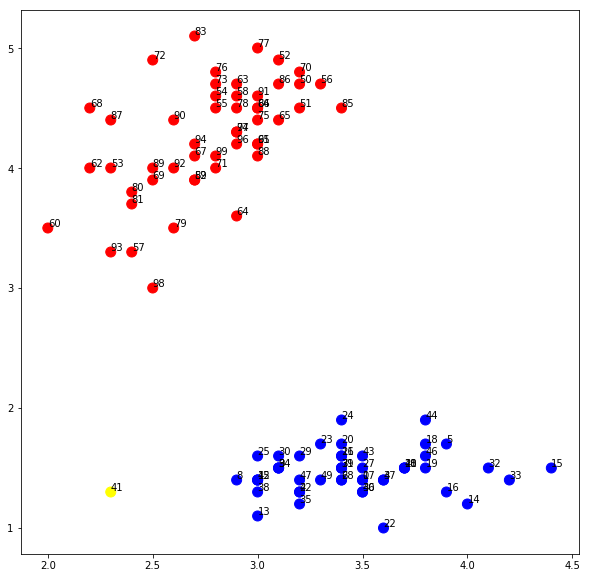

In [12]:
# Make 3 clusters. Discuss the result
#

A=range(0,100)
dnew = d[A,1:3]

Z = hierarchy.linkage(dnew,method = 'single', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(10,10))
colors=['red','blue', 'yellow']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

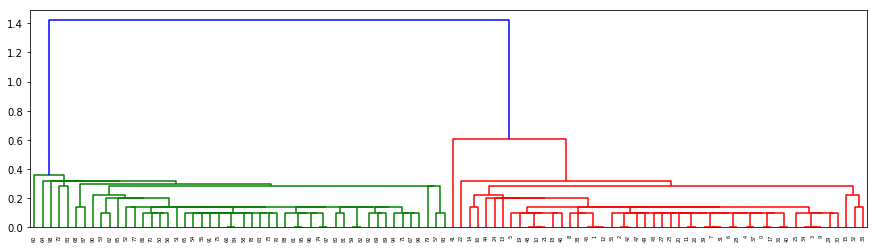

In [13]:
plt.figure(figsize = (15,4))
hierarchy.dendrogram(Z);


<h4>
<strong>
    <!--discuss 3 cluster results.-->
    The data points on the given scatter plot are not distributed evenly between the three clusters. This result makes sense based on the parameters that I passed to the hierarchy.linkage() method. "method = 'single'" groups the points by shortest distance between points, while "criterion='maxclust'" in the hierarchy.fcluster() method sets a boundary on the furthest distance two points can have while remaining in the same cluster. This boundary is the reason data point '41' is the sole member of the 'yellow' cluster. Additionally, the aforementioned minimal and maximum values I choose are the reason the red and blue clusters are so large, in comparison to the yellow. Basically, these parameters are not good for this dataset.
   
</strong>
    </h4>

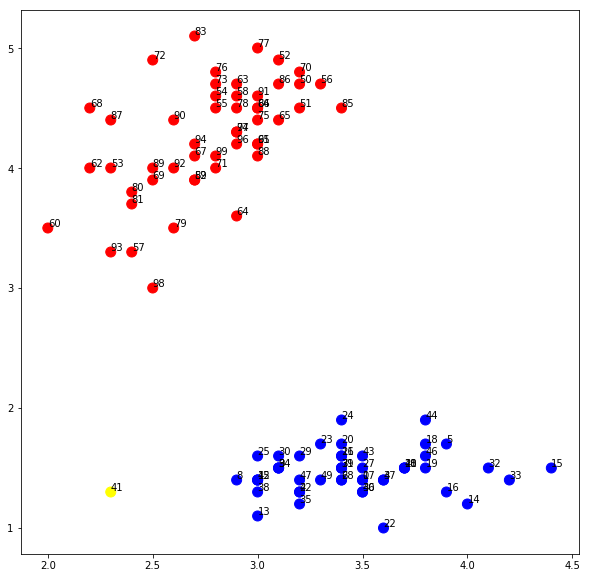

In [121]:
# Use several different methods, other than 'single'. 
# Try 'average' and one more of your choice. Discuss the result.

A=range(0,100)
dnew = d[A,1:3]

Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(10,10))

colors=['red','blue','yellow']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

<h2>
<strong>
   Changing the method to 'average' from 'single' in hierarchy.linkage() didn't change the scatter plot of our data points at all.
    </strong>
    </h2>

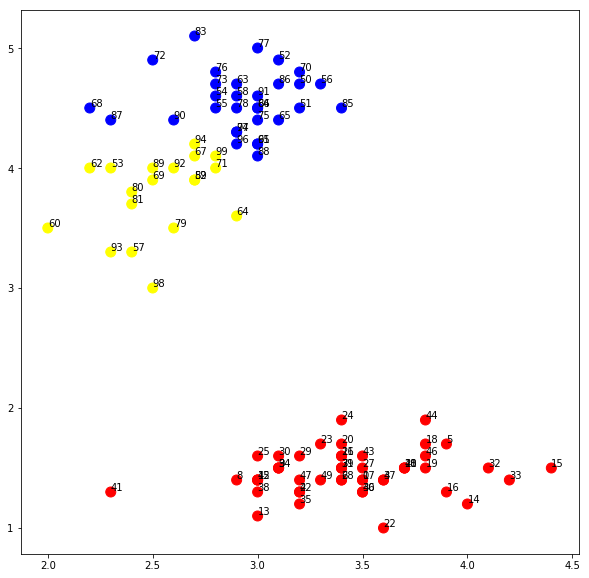

In [122]:
# Use several different methods, other than 'single'. 
# Try 'average' and one more of your choice. Discuss the result.

A=range(0,100)
dnew = d[A,1:3]

Z = hierarchy.linkage(dnew,method = 'ward', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(10,10))

colors=['red','blue','yellow']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

<h2>
<strong>
   Using the 'Ward' method seems like it has distributed the data points very nicely between the 3 clusters we wanted.
    </strong>
    </h2>

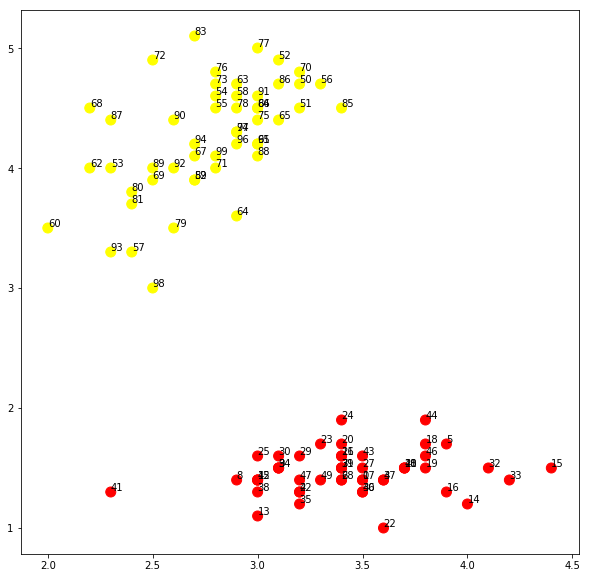

In [123]:
# Use a metric other than 'Eucliedean'. Discuss the result.

A=range(0,100)
dnew = d[A,1:3]

Z = hierarchy.linkage(dnew,method = 'single', metric = 'correlation')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
plt.figure(figsize=(10,10))

colors=['red','blue','yellow']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

<h2>
<strong>
Changing metric in hierarchy.linkage() to 'correlation' changed our scatter plot a lot compared to our previous results. Even though I requested three clusters, the boundaries set by 'correlation' created two clusters instead. 
</strong>
    </h2>

**Question 2**. Run the clustering on the whole Iris data set, using only 2nd and 3rd columns. Plot the results. Try to figure out which is the best number of clusters.

150


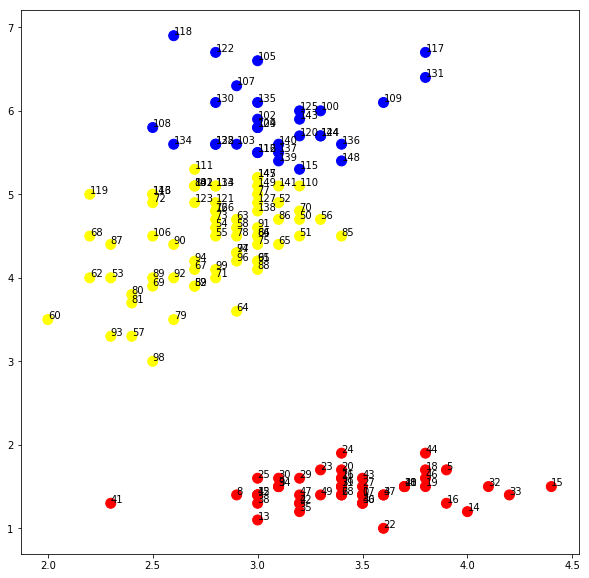

In [124]:
A=range(0,150)
dnew = d[A,1:3]

Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print(np.size(cl))
plt.figure(figsize=(10,10))
colors=['red','blue', 'yellow']#, 'green', 'purple','teal']
plt.scatter(dnew[A,0],dnew[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dnew[i,0],dnew[i,1]+0.01,s=str(i),size=10)

<strong>
START OF QUESTION 3:</strong><br>
Each of the 150 flowers in Iris data set is labeled as one of 3 types of Irises. This information is in your variable `y`. Let us look at the cross-tabulation between the found clusters and the type of a flower:

In [125]:
dnew = d[:,1:3]
# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
# Picks 2 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['Cluster'], colnames=['Types of Irises'])

Types of Irises   0   1   2
Cluster                    
1                50   0   0
2                 0   0  31
3                 0  50  19


**Question 3**. Discuss the cross-tabulation result. Do you think clustering did a good job?

<h2>
<strong>
    It seems hierarchical clustering with these parameters on this data set isn't the most effective solution. This is clearly shown by cluster 2 having almost 20 less data points than clusters 1 and 2. Additionally, cluster 3 has almost 20 more data points than any other cluster so that may be something to be concerned with but we would need to plot the points to see the visualized clusters.
</strong>
    </h2>

**Question 4**. Repeat the clustering, but this time find 3 clusters. Chack the cross-tabulate and discuss if you are happy with the result. Try with 4 and 5 clusters.

y    0   1   2
cl            
1   50   0   0
2    0   0  31
3    0  50  19

y    0   1   2
c2            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  50  19

y    0   1   2
c3            
1   49   0   0
2    1   0   0
3    0   0  31
4    0  31  19
5    0  19   0


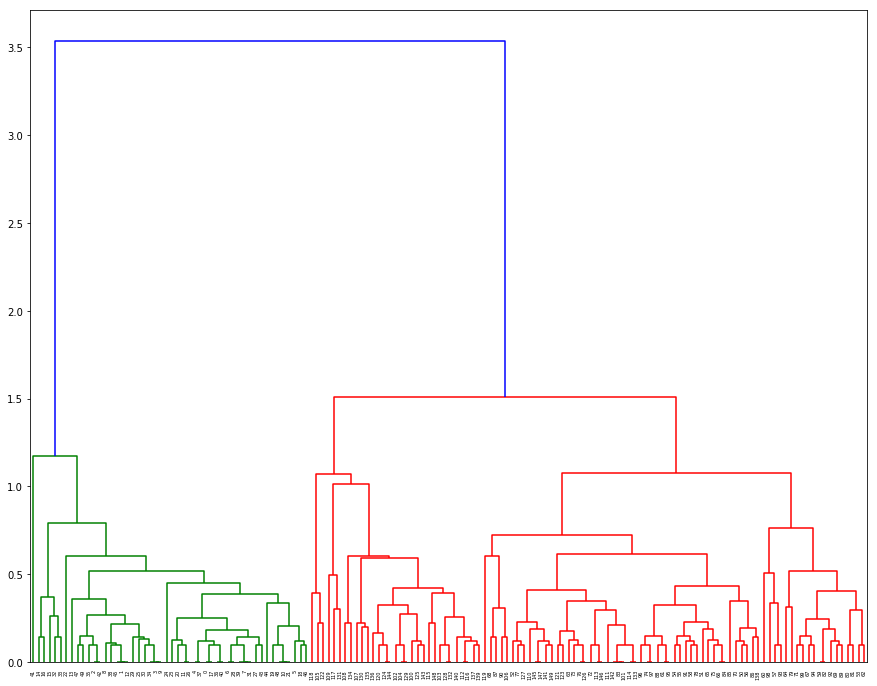

In [126]:
dnew = d[:,1:3]
# Build a dendrogram using average-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dnew,method = 'average', metric = 'euclidean')
plt.figure(figsize = (15,12))
hierarchy.dendrogram(Z);


# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')
print crosstab(cl, y, rownames=['cl'], colnames=['y'])
print

# Picks 4 clusters
c2 = hierarchy.fcluster(Z, 4, criterion='maxclust')
print crosstab(c2, y, rownames=['c2'], colnames=['y'])
print

# Picks 5 clusters
c3 = hierarchy.fcluster(Z, 5, criterion='maxclust')
print crosstab(c3, y, rownames=['c3'], colnames=['y'])

**Question 5**. Cross-tabulate results are useful for figuring out the quality of clustering. Your task is to propose a formula that uses the result of cross-tabulation to come up with a single number that measures the success of clustering. Please justify why you selected the formula.

<h3>
      <strong>
Formula:<br>
Acurracy = (1 / totalNumber) SUM ( max |( c1 ) ∩ ( c2 ) ∩ ( c3 )| ) <br>
    </strong>
</h3>
<h3>
    <strong>
Justification:<br>
With the above formula we attempt to use what is most frequent in the cluster during each execution until SUM index is met during each execution. Then we divide the SUM by total number (totalNumber) of data points to get the accuracy of our cross-tabulation
    </strong>
</h3>

**Question 6**. Repeat the clustering on the original Iris data, which has 4 attributes. Plot the scatter plot of the resulting clustering (remember, you can pick to see only 2 of the dimensions). Alternativelly, do SVD to project your data to 2 dimensionas and again plot the scatter plot. Take a look at the cross-tabulation. Try different clustering parameters and try to find the best clustering. Decide which choice of the parameters gives you the best results. Report on your findings with justifications for your conclusion.

Types of Irises   0   1   2
cluster                    
1                50   0   0
2                 0  50  50


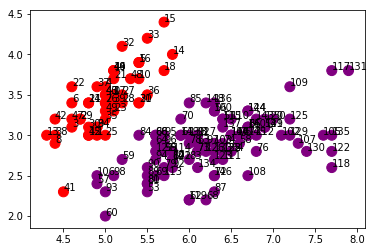

In [127]:
#without SVD

A=range(0,150)
dNewAgain = d[A,0:3]

# Build a dendrogram using single-linkage clustering and Euclidean distance
Z = hierarchy.linkage(dNewAgain,method = 'average', metric = 'Euclidean')
# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='distance')

plt.figure()
colors=['red','blue', 'purple']
plt.scatter(dNewAgain[A,0],dNewAgain[A,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
for i in A:
    plt.text(dNewAgain[i,0],dNewAgain[i,1]+0.01,s=str(i),size=10)
print crosstab(cl, y, rownames=['cluster'], colnames=['Types of Irises'])

<h3><strong>
#Decide which choice of the parameters gives you the best results.<br> 
#Report on your findings with justifications for your conclusion:

After trying multiple parameters I found that this set of parameters gave roughly the best results because none of the clusters are overlapping. While the data points could be distributed more evenly per cluster I wasn't able to find parameters that would give me that result and this seemed to cluster the points in a proper way.
</strong></h3>

## K-Means Clustering

K-means clustering is another clustering algorithm (we will cover it in class tomorrow). It still receives a data set as an input, as well as the desired number of clusters, and outputs the assignment of data points to clusters.

Let us illustrate how to use k-means on the iris data.

y    0   1   2
cl            
0    0   4  28
1   50   0   0
2    0   0  19
3    0  16   0
4    0  30   3


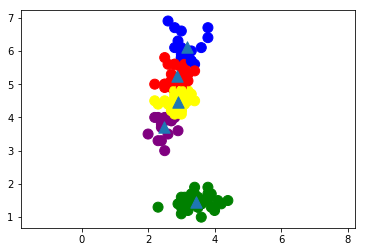

In [128]:
# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
kmeans = kmeans.fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])


In [129]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 0, 3, 4, 4, 4, 3, 4, 3, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 3, 4, 3, 0, 4, 4, 4, 4, 0, 4, 3, 3, 3, 3, 0, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 2, 0, 2, 0, 2, 2, 4, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 4, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0], dtype=int32)

**Question 7**. Discuss on the quality of outcome of k-means clustering

<h2>
<strong>
    K-means clustering evenly distributed the five (5) clusters it was told to find, around the five (5) center points. Additionally, the clusters seem to be perfectly grouped. 
</strong>
    </h2>

**Question 8**. Repeat k-means clustering, but this time change the nnumber of clusters to 3. Discuss the results. Compare the results with the results of hierarchical clustering from **Question 4**.

y    0   1   2
cl            
0   50   0   0
1    0   2  41
2    0  48   9


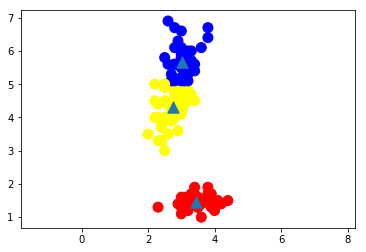

In [130]:
# the following command results in creating of 2 clusters of `dnew` data
kmeans = KMeans(n_clusters=3, random_state=0).fit(dnew)
kmeans = kmeans.fit(dnew)
# cl are the assignments of points to one of the 3 clusters
cl=kmeans.labels_
# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cl'], colnames=['y'])



<h2>
<strong>
    Compared to question 4 this clustering has greatly improved results. This shows that we are getting closer to the best parameters to cluster this dataset.
</strong>
    </h2>

**Question 9**. Repeat k-means clustering on the whole Iris data set, the same as you did in **Question 6**. Discuss your results and compare them to the hierarchical clustering results.

Types of Irises   0   1   2
cluster                    
0                 0  23  13
1                50   0   0
2                 0   0  10
3                 0  24   1
4                 0   3  26


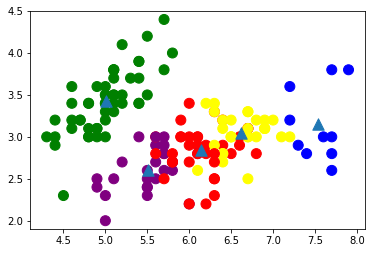

In [131]:
A=range(0,150)
dnew = d[A,0:3]

# the following command results in creating of 5 clusters of `dnew` data
kmeans = KMeans(n_clusters=5, random_state=0).fit(dnew)
kmeans = kmeans.fit(dnew)
# cl are the assignments of points to one of the 5 clusters
cl=kmeans.labels_
# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen=kmeans.cluster_centers_
# plot the results
colors=['red','green','blue','purple','yellow']
plt.figure()
plt.scatter(dnew[:,0],dnew[:,1],c=cl, cmap=matplotlib.colors.ListedColormap(colors),s=100,facecolors='none')
plt.scatter(cen[:,0],cen[:,1],s=130, marker="^")
plt.axis('equal')

# cross-tabulation with the flower types
print crosstab(cl, y, rownames=['cluster'], colnames=['Types of Irises'])

<h2>
<strong>
While the distribution of data points to clusters has improved from hierarchical clustering the distribution is still pretty bad. It can definitely be improved, possibly through less clusters. 
</strong>
    </h2>

## Lab 6.b Document Clustering (50% of grade)

In this part of the lab assignment, you will apply your clustering knowledge on the Newsgroup data from **Lab 5**. The following is a list of questions.

1. Select $N = 100$ random documents and their types from the newsgroup data. Use Google search to figure out how to do it in Python. The reason we are doing this is that hierrchical clustering can be very slow on large data sets.

2. Find 3 clusters using deafult (single-link, Eucliedan distance) hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

4. Repeat step 3, but this type use k-means clustering. Compare with the results from step 3.

5. Instead of $N = 100$, select $N= 200, 500, 1000, 2000, 5000$ random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with $N$. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?

<h3><strong>
Part B Question 1
</strong></h3>

In [132]:
documents = np.loadtxt('documents.csv', delimiter=",",dtype='int')
documentsT = np.transpose(documents)
newsgroup = np.loadtxt('newsgroup.csv', delimiter=",",dtype='int')
groupnames = np.loadtxt('groupnames.csv', delimiter=",",dtype='str')

In [148]:
#Select N=100random documents and their types from the newsgroup data. 
#Use Google search to figure out how to do it in Python. 
#The reason we are doing this is that hierrchical clustering can be 
#very slow on large data sets.
import random 

linkageRow = np.array(random.sample(xrange(len(newsgroup)), 100))  

documentsT1 = documentsT[linkageRow]
newsG_T = newsgroup[linkageRow]

<h3><strong>
Part B Question 2
</strong></h3>

In [134]:
#Find 3 clusters using deafult (single-link, Eucliedan distance) 
#hierarchical clustering. Use cross-tabulation to measure the quality of clustering.

Z = hierarchy.linkage(documentsT1,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

# creates crosstab 
crosstab(cl, newsG_T, rownames=['cluster'], colnames=['newsGroup_T'])
 

newsGroup_T,1,2,3,4
cluster,,,,
1,24,28,12,34
2,0,1,0,0
3,1,0,0,0


<h3><strong>
Part B Question 3
</strong></h3>

In [135]:
#3. Repeat step 2, by trying to find a better choice of parameters for hierarchical clustering. 
#Try the Jaccard or cosine distance instead of Eucliedean. Report on your findings

Step3_linkageRow = np.array(random.sample(xrange(len(newsgroup)), 100))  

documentsT2 = documentsT[Step3_linkageRow]
newsG_T = newsgroup[Step3_linkageRow]


Z = hierarchy.linkage(documentsT2,method = 'single', metric = 'jaccard')

# Picks 3 clusters
cl = hierarchy.fcluster(Z, 3, criterion='maxclust')

print('hierarchical clustering with jaccard')
crosstab(cl, newsG_T, rownames=['cluster'], colnames=['newsG_T'])



hierarchical clustering with jaccard


newsG_T,1,2,3,4
cluster,,,,
1,22,21,13,42
2,0,1,0,0
3,0,1,0,0


<h4>
    <strong>
Jaccard and Cosine produce similar results, (I ran cosine and then changed it jaccard to compare), to Eucliedean with the majority of our results in one cluster. I believe this is a result of the "method = 'single'" in the hierarchy.linkage() method and 'maxclust' in the hierarchy.fcluster() method.
    </strong>
    </h4>

<h3><strong>
Part B Question 4. 
</strong></h3>

In [136]:
#Repeat step 3, but this type use k-means clustering. 
#Compare with the results from step 3.

documentsT4 = documentsT[linkageRow]
newsG_T4 = newsgroup[linkageRow]


# the following command results in creating of 3 clusters of `` data
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(documentsT4)

# cl are the assignments of points to one of the 3 clusters
cluster1=kmeans1.labels_

# cen are the centers of the 3 clusters, obtained by finding the average of all examples assigned to the clusters
cen1=kmeans1.cluster_centers_

print('Kmeans')
# cross-tabulation
crosstab(cl, newsG_T4, rownames=['cluster'], colnames=['newsG_T'])

Kmeans


newsG_T,1,2,3,4
cluster,,,,
1,25,29,12,32
2,0,0,0,1
3,0,0,0,1


<h4>
    <strong>
Again, the majority of the data points are in one cluster. This disproves my point from Part b question 3 that 'single' in the hierarchy.linkage() method and 'maxclust' in the hierarchy.fcluster() method. So the problem may be in using three (3) clusters for our data but I think it is something else.
    </strong>
 </h4>

<h3><strong>
Part B Question 5. 
</strong></h3>

<h4><strong>
Instead of N=100, select 𝑁=200,500,1000,2000,5000 random documents. Set number of clusters to 5. Apply hierarchical and k-means clustering on such data and measure time. Discuss how does the time scale with N. For k-means clustering, discuss how do the clusters centers change as the data size increases -- do you see some qualitative improvements in the quality of clustering?
</strong></h4>

In [137]:
#𝑁=200 hierarchical
import time

#get start time
start = time.time()

linkageRow200 = np.array(random.sample(xrange(len(newsgroup)), 200))  

documentsT200 = documentsT[linkageRow200]
newsG_T200 = newsgroup[linkageRow200]

Z200 = hierarchy.linkage(documentsT200,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl200 = hierarchy.fcluster(Z200, 5, criterion='maxclust')

# creates crosstab 
print(crosstab(cl200, newsG_T200, rownames=['cluster200'], colnames=['newsGroup_T200']))

#get end time
end = time.time()

print
print(end-start)

newsGroup_T200   1   2   3   4
cluster200                    
1               66  33  32  65
2                0   0   1   0
3                0   0   1   0
4                0   0   0   1
5                0   0   1   0

0.0239810943604


In [138]:
#N=500 hierarchical
#get start time
start = time.time()

linkageRow500 = np.array(random.sample(xrange(len(newsgroup)), 500))  

documentsT500 = documentsT[linkageRow500]
newsG_T500 = newsgroup[linkageRow500]

Z500 = hierarchy.linkage(documentsT500,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl500 = hierarchy.fcluster(Z500, 5, criterion='maxclust')

# creates crosstab 
print(crosstab(cl500, newsG_T500, rownames=['cluster500'], colnames=['newsGroup_T500']))

#get end time
end = time.time()

print
print(end-start)

newsGroup_T500    1    2   3    4
cluster500                       
1               153  117  66  162
2                 1    0   0    0
3                 0    1   0    0

0.0324690341949


In [139]:
#N=1000 hierarchical
#get start time
start = time.time()

linkageRow1000 = np.array(random.sample(xrange(len(newsgroup)), 1000))  

documentsT1000 = documentsT[linkageRow1000]
newsG_T1000 = newsgroup[linkageRow1000]

Z1000 = hierarchy.linkage(documentsT1000,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl1000 = hierarchy.fcluster(Z1000, 5, criterion='maxclust')

# creates crosstab 
print(crosstab(cl1000, newsG_T1000, rownames=['cluster1000'], colnames=['newsGroup_T1000']))

#get end time
end = time.time()

print
print(end-start)

newsGroup_T1000    1    2    3    4
cluster1000                        
1                280  217  169  330
2                  0    0    0    1
3                  0    0    0    1
4                  0    0    1    0
5                  0    0    0    1

0.0722332000732


In [140]:
#N=2000 hierarchical
#get start time
start = time.time()

linkageRow2000 = np.array(random.sample(xrange(len(newsgroup)), 2000))  

documentsT2000 = documentsT[linkageRow2000]
newsG_T2000 = newsgroup[linkageRow2000]

Z2000 = hierarchy.linkage(documentsT2000,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl2000 = hierarchy.fcluster(Z2000, 5, criterion='maxclust')

# creates crosstab 
print(crosstab(cl2000, newsG_T2000, rownames=['cluster2000'], colnames=['newsGroup_T2000']))

#get end time
end = time.time()

print
print(end-start)

newsGroup_T2000    1    2    3    4
cluster2000                        
1                542  436  337  681
2                  1    0    0    0
3                  0    1    0    0
4                  0    0    1    0
5                  0    1    0    0

0.223755121231


In [141]:
#N=5000 hierarchical
#get start time
start = time.time()

linkageRow5000 = np.array(random.sample(xrange(len(newsgroup)), 5000))  

documentsT5000 = documentsT[linkageRow5000]
newsG_T5000 = newsgroup[linkageRow5000]

Z5000 = hierarchy.linkage(documentsT5000,method = 'single', metric = 'euclidean')

# Picks 3 clusters
cl5000 = hierarchy.fcluster(Z5000, 5, criterion='maxclust')

# creates crosstab 
print(crosstab(cl5000, newsG_T5000, rownames=['cluster5000'], colnames=['newsGroup_T5000']))

#get end time
end = time.time()

print
print(end-start)

newsGroup_T5000     1     2    3     4
cluster5000                           
1                1411  1112  768  1705
2                   0     0    1     0
3                   0     0    1     0
4                   0     0    1     0
5                   0     1    0     0

1.28350305557


<h3><strong>
    Part B question 5 K-means
    </strong></h3>

In [151]:
#get start time
start = time.time()

linkageRowK200 = np.array(random.sample(xrange(len(newsgroup)), 200)) 

documentsTK200 = documentsT[linkageRowK200]
newsG_TK200 = newsgroup[linkageRowK200]


# the following command results in creating of 5 clusters of `` data
kmeansK200 = KMeans(n_clusters=5, random_state=0).fit(documentsTK200)

# cl are the assignments of points to one of the 3 clusters
cluster200=kmeansK200.labels_

# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen200=kmeansK200.cluster_centers_

print('Kmeans 200')
# cross-tabulation
print(crosstab(cl200, newsG_TK200, rownames=['cluster'], colnames=['newsG_T']))

#get end time
end = time.time()

print
print(end-start)

Kmeans 200
newsG_T   1   2   3   4
cluster                
1        54  37  26  79
2         0   0   0   1
3         0   0   1   0
4         1   0   0   0
5         0   0   0   1

0.0765829086304


In [152]:
#get start time
start = time.time()

linkageRowK500 = np.array(random.sample(xrange(len(newsgroup)), 500)) 

documentsTK500 = documentsT[linkageRowK500]
newsG_TK500 = newsgroup[linkageRowK500]


# the following command results in creating of 5 clusters of `` data
kmeansK500 = KMeans(n_clusters=5, random_state=0).fit(documentsTK500)

# cl are the assignments of points to one of the 5 clusters
cluster500=kmeansK500.labels_

# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen500=kmeansK500.cluster_centers_

print('Kmeans 500')
# cross-tabulation
print(crosstab(cl500, newsG_TK500, rownames=['cluster'], colnames=['newsG_T']))

#get end time
end = time.time()

print
print(end-start)

Kmeans 500
newsG_T    1    2   3    4
cluster                   
1        148  118  70  162
2          1    0   0    0
3          0    0   0    1

0.0999748706818


In [144]:
#get start time
start = time.time()

linkageRowK1000 = np.array(random.sample(xrange(len(newsgroup)), 1000)) 

documentsTK1000 = documentsT[linkageRowK1000]
newsG_TK1000 = newsgroup[linkageRowK1000]


# the following command results in creating of 5 clusters of `` data
kmeansK1000 = KMeans(n_clusters=5, random_state=0).fit(documentsTK1000)

# cl are the assignments of points to one of the 5 clusters
cluster1000=kmeansK1000.labels_

# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen1000=kmeansK1000.cluster_centers_

print('Kmeans 1000')
# cross-tabulation
print(crosstab(cl1000, newsG_TK1000, rownames=['cluster'], colnames=['newsG_T']))

#get end time
end = time.time()

print
print(end-start)

Kmeans 1000
newsG_T    1    2    3    4
cluster                    
1        271  231  173  321
2          1    0    0    0
3          0    0    0    1
4          0    1    0    0
5          0    0    0    1

0.151212930679


In [145]:
#get start time
start = time.time()

linkageRowK2000 = np.array(random.sample(xrange(len(newsgroup)), 2000)) 

documentsTK2000 = documentsT[linkageRowK2000]
newsG_TK2000 = newsgroup[linkageRowK2000]


# the following command results in creating of 5 clusters of `` data
kmeansK2000 = KMeans(n_clusters=5, random_state=0).fit(documentsTK2000)

# cl are the assignments of points to one of the 3 clusters
cluster2000=kmeansK2000.labels_

# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen2000=kmeansK2000.cluster_centers_

print('Kmeans 2000')
# cross-tabulation
print(crosstab(cl2000, newsG_TK2000, rownames=['cluster'], colnames=['newsG_T']))

#get end time
end = time.time()

print
print(end-start)

Kmeans 2000
newsG_T    1    2    3    4
cluster                    
1        567  409  319  701
2          0    0    1    0
3          0    0    1    0
4          0    0    0    1
5          0    0    0    1

0.230922937393


In [146]:
#get start time
start = time.time()

linkageRowK5000 = np.array(random.sample(xrange(len(newsgroup)), 5000)) 

documentsTK5000 = documentsT[linkageRowK5000]
newsG_TK5000 = newsgroup[linkageRowK5000]


# the following command results in creating of 5 clusters of `` data
kmeansK5000 = KMeans(n_clusters=5, random_state=0).fit(documentsTK5000)

# cl are the assignments of points to one of the 5 clusters
cluster5000=kmeansK5000.labels_

# cen are the centers of the 5 clusters, obtained by finding the average of all examples assigned to the clusters
cen5000=kmeansK5000.cluster_centers_

print('Kmeans 5000')
# cross-tabulation
print(crosstab(cl5000, newsG_TK5000, rownames=['cluster'], colnames=['newsG_T']))

#get end time
end = time.time()

print
print(end-start)

Kmeans 5000
newsG_T     1     2    3     4
cluster                       
1        1428  1064  829  1675
2           0     1    0     0
3           0     0    0     1
4           0     0    0     1
5           0     0    0     1

0.509525060654


In [147]:
#Discuss how does the time scale with N. For k-means clustering, 
#discuss how do the clusters centers change as the #data size increases -- 
#do you see some qualitative improvements in the quality of clustering?

<h3><strong>
The time scales very quickly as N grows when using hierarchical clustering. Very surprisingly when using k-means the time scales extremely slow, showing why k-means is so much better for large datasets compared to hierarchical clustering. I don't see an improvement in the distribution of the data set, almost everything is still in one cluster but that is the result of the dataset.
    </strong></h3>